# Introducción 
Para desarrollar este laboratorio tendrás que cargar algunas herramientas básicas que te permitirán trabajar con los datos. 

# Recordatorio
Los tipos de datos pueden clasificarse en :

*   **CATEGORICOS** (cualitativos), que a su vez pueden ser **NOMINALES u ORDINALES**
*   **NUMERICOS** (cuantitativos), que a su vez pueden ser **INTERVALO o RADIO**

Además, los atributos de datos numéricos indican:
*   que es **DISCRETO**, cuando tiene un número finito o contable de valores (enteros o binarios)
*    que es **CONTINUO**, cuando tiene un número infinito de valores posibles (reales)



 

# Actividades
Las actividades que desarrollaremos en este laboratorio son las siguientes: 

- Cargar dos archivos con datos en tu entorno de trabajo 
- Revisar los tipos de datos de cada tabla
- Unir los dos archivos en uno solo
- Revisar el resultado y plantear algunas preguntas

¡Empezamos! 
## Importar las librerías 
Antes de empezar vamos a importar las siguientes librerías: 

- Pandas 
- Numpy 
- Matplotlib

In [1]:
# importa las librerías a nuestro entorno de trabajo
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


Basta con importar una vez las librerías a nuestro entorno. 

Recuerda que una de las habilidades básicas que debes aprender es corregir errores y buscar la documentación para dar solución a un problema.

## Cargar un archivo de datos

Hay varias maneras de cargar un archivo de datos en nuestro entorno. El archivo lo podemos llamar desde una URL o tener guardado en nuestra computadora.

En este caso subiremos subir un primer archivo en forma local (el profesor te facilitirá los archivos) ejecutando lo siguiente:

In [2]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df1 = pd.read_csv(name, sep=";")


Saving 1_3_3_Datos_1.csv to 1_3_3_Datos_1 (1).csv


Luego, subiremos el siguiente archivo:

In [3]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df2 = pd.read_csv(name, sep=";")


Saving 1_3_4_Datos_2.csv to 1_3_4_Datos_2 (1).csv


### Explorando el archivo con los datos
Revisa las **primeras 10 filas de cada archivo** y trata de entender los datos que poseen. Por cada  archivo y por cada dato, indica que tipo de atributo de dato se usaron para crear los dataframe.

Por ejemplo :
**plot** es un DATO NUMERICO DE TIPO RADIO, DISCRETO

Recuerda que para mirar las primeras filas del primer dataframe podemos ejecutar lo siguiente (en este caso, las tres primeras): 


In [19]:
df1.head(10)


,species_id,genus,species,taxa
0,AB,Amphispiza,bilineata,Bird
1,AH,Ammospermophilus,harrisi,Rodent
2,AS,Ammodramus,savannarum,Bird
3,BA,Baiomys,taylori,Rodent
4,CB,Campylorhynchus,brunneicapillus,Bird
5,CM,Calamospiza,melanocorys,Bird
6,CQ,Callipepla,squamata,Bird
7,CS,Crotalus,scutalatus,Reptile
8,CT,Cnemidophorus,tigris,Reptile
9,CU,Cnemidophorus,uniparens,Reptile


* species_id: STring
* genus:String
* species:String
* taxa:String

---



In [20]:
df2.head(10)

,record_id,month,day,year,plot,species_id,sex,wgt
0,1,7,16,1977,2,NaN,M,NaN
1,2,7,16,1977,3,NaN,M,NaN
2,3,7,16,1977,2,DM,F,NaN
3,4,7,16,1977,7,DM,M,NaN
4,5,7,16,1977,3,DM,M,NaN
5,6,7,16,1977,1,PF,M,NaN
6,7,7,16,1977,2,PE,F,NaN
7,8,7,16,1977,1,DM,M,NaN
8,9,7,16,1977,1,DM,F,NaN
9,10,7,16,1977,6,PF,F,NaN


Por cada uno de los archivos, debes conocer el número de filas. Para ello, contaremos las del archivo uno. Tú debes indicar cuantas filas tiene el otro archivo.
 

In [5]:
df1.count()


species_id    55
genus         54
species       54
taxa          55
dtype: int64

In [11]:
df2.count()

record_id     3685
month         3685
day           3685
year          3685
plot          3685
species_id    3346
sex           3337
wgt           3089
dtype: int64

### Uniendo DataFrames

Unir DataFrames es usar columnas en cada dataset que contienen valores comunes (un ID única común) para realizar un “joining” (unión). Las columnas que contienen los valores comunes se llaman “join key(s)” (claves de unión). Muchas veces uniendo DataFrames de esta manera es útil cuando un DataFrame es una “lookup table” (tabla de búsqueda) que contiene datos adicionales que queremos incluir en el otro DataFrame.

NOTA: Este proceso de unir tablas es similar a lo que hacemos con las tablas en una base de datos SQL.

IDENTIFICANDO KEYS : Para identificar las claves de combinación adecuadas, primero necesitamos saber cuáles campos son compartidos entre los archivos (DataFrames). Podríamos inspeccionar los dos DataFrames para identificar estas columnas. Si tenemos suerte, los dos DataFrames tendrán columnas con el mismo nombre que también contienen los mismos datos.

In [21]:
df1.columns


Index(['species_id', 'genus', 'species', 'taxa'], dtype='object')

In [22]:
df2.columns

Index(['record_id', 'month', 'day', 'year', 'plot', 'species_id', 'sex',
       'wgt'],
      dtype='object')

La clave de unión es la columna que contiene el identificador de especie de dos letras, que se llama species_id.

Ahora que conocemos los campos con los atributos de ID de especies comunes en cada DataFrame, estamos listos para unir nuestros datos. Sin embargo, porque hay diferentes tipos de uniones, también debemos decidir qué tipo de unión tiene sentido para nuestro análisis.

### Uniones Internas
El tipo más común de unión se llama inner join (unión interna). Una combinación interna combina dos DataFrames basados en una clave de unión y devuelve un nuevo DataFrame que contiene solo aquellas filas que tienen valores coincidentes entre los dos DataFrames originales.

Las uniones internas producen un DataFrame que contiene solo filas donde el valor que es el subjecto de la unión existe en las dos tablas.

La función para realizar uniones se llama merge y una unión interna es la opción por defecto.

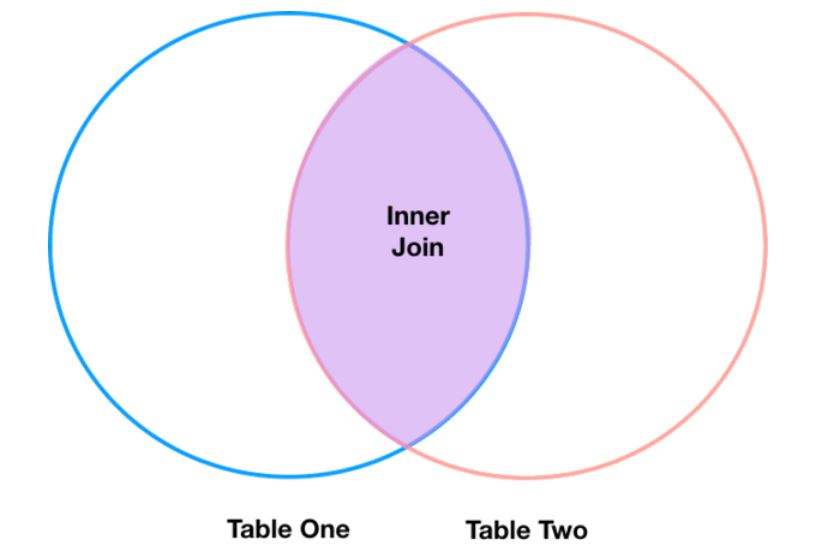

In [30]:
merged_inner = pd.merge(left=df2,right=df1, left_on='species_id', right_on='species_id')
# ¿Cuál es el tamaño de los datos en el resultado?
merged_inner.shape
merged_inner



,record_id,month,day,year,plot,species_id,sex,wgt,genus,species,taxa
0,3,7,16,1977,2,DM,F,NaN,Dipodomys,merriami,Rodent
1,4,7,16,1977,7,DM,M,NaN,Dipodomys,merriami,Rodent
2,5,7,16,1977,3,DM,M,NaN,Dipodomys,merriami,Rodent
3,8,7,16,1977,1,DM,M,NaN,Dipodomys,merriami,Rodent
4,9,7,16,1977,1,DM,F,NaN,Dipodomys,merriami,Rodent
...,...,...,...,...,...,...,...,...,...,...,...
3341,3319,9,8,1980,3,CM,NaN,NaN,Calamospiza,melanocorys,Bird
3342,3320,9,8,1980,3,CM,NaN,NaN,Calamospiza,melanocorys,Bird
3343,3352,10,11,1980,10,CM,NaN,NaN,Calamospiza,melanocorys,Bird
3344,3200,8,13,1980,19,CQ,NaN,NaN,Callipepla,squamata,Bird


In [31]:
merged_inner.count()

record_id     3346
month         3346
day           3346
year          3346
plot          3346
species_id    3346
sex           3213
wgt           2971
genus         3346
species       3346
taxa          3346
dtype: int64

El resultado de una unión interna de df1 y df2 es un nuevo DataFrame que contiene el conjunto combinado de columnas de ambos DataFrame. Solo contiene filas que tienen códigos de dos letras de species-id que son iguales en el df1 y el df2 DataFrames. En otras palabras, si una fila en df1 tiene un valor de species_id que no aparece en la species_id columna de df2, no será incluirá en el DataFrame devuelto por una unión interna y viceversa.

### Unión izquierda
¿Qué pasa si queremos agregar información de df2 a df1 sin perder información de df1? En este caso, utilizamos un diferente tipo de unión llamada “left outer join (unión externa izquierda)”, or a “left join (unión izquierda)”. 
Debes darte cuenta que una unión izquierda todavía descartará las filas del right DataFrame que no tienen valores para la(s) clave(s) de unión en el left DataFrame.

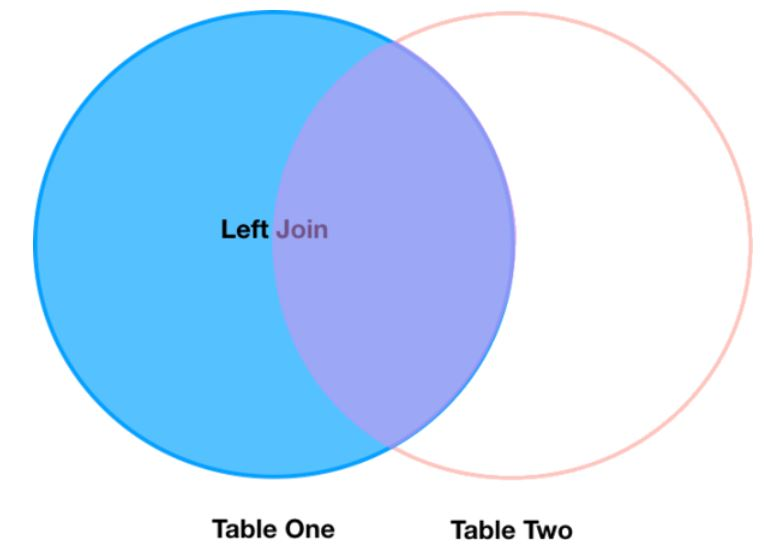

In [9]:
merged_left = pd.merge(left=df2,right=df1, how='left', left_on='species_id', right_on='species_id')

merged_left




,record_id,month,day,year,plot,species_id,sex,wgt,genus,species,taxa
0,1,7,16,1977,2,NaN,M,NaN,NaN,NaN,NaN
1,2,7,16,1977,3,NaN,M,NaN,NaN,NaN,NaN
2,3,7,16,1977,2,DM,F,NaN,Dipodomys,merriami,Rodent
3,4,7,16,1977,7,DM,M,NaN,Dipodomys,merriami,Rodent
4,5,7,16,1977,3,DM,M,NaN,Dipodomys,merriami,Rodent
...,...,...,...,...,...,...,...,...,...,...,...
3680,3681,12,16,1980,11,DM,F,59.0,Dipodomys,merriami,Rodent
3681,3682,12,16,1980,17,PE,F,19.0,Peromyscus,eremicus,Rodent
3682,3683,12,16,1980,12,DM,M,44.0,Dipodomys,merriami,Rodent
3683,3684,12,16,1980,13,DM,M,52.0,Dipodomys,merriami,Rodent


En esta unión, el número de filas es igual al número de filas del DataFrame df2 (record_id).

### Otros Tipos de Unión
Experimenta con otros tipos de unión:

*   RIGTH (outer) join, unión derecha.
*   FULL (outer) join, unión completa



**RIGTH (outer) join, unión derecha.**

In [44]:


merged_rigth=pd.merge(df1,df2,on="species_id",how="right")

merged_rigth

,species_id,genus,species,taxa,record_id,month,day,year,plot,sex,wgt
0,NaN,NaN,NaN,NaN,1,7,16,1977,2,M,NaN
1,NaN,NaN,NaN,NaN,2,7,16,1977,3,M,NaN
2,NaN,NaN,NaN,NaN,22,7,17,1977,15,F,NaN
3,NaN,NaN,NaN,NaN,38,7,17,1977,17,M,NaN
4,NaN,NaN,NaN,NaN,72,8,19,1977,2,M,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3680,CM,Calamospiza,melanocorys,Bird,3319,9,8,1980,3,NaN,NaN
3681,CM,Calamospiza,melanocorys,Bird,3320,9,8,1980,3,NaN,NaN
3682,CM,Calamospiza,melanocorys,Bird,3352,10,11,1980,10,NaN,NaN
3683,CQ,Callipepla,squamata,Bird,3200,8,13,1980,19,NaN,NaN


**FULL (outer) join, unión completa**

In [45]:
merged_full=pd.merge(df1,df2,on="species_id",how="outer")

merged_full

,species_id,genus,species,taxa,record_id,month,day,year,plot,sex,wgt
0,AB,Amphispiza,bilineata,Bird,3126.0,7.0,21.0,1980.0,8.0,NaN,NaN
1,AB,Amphispiza,bilineata,Bird,3146.0,7.0,21.0,1980.0,24.0,NaN,NaN
2,AB,Amphispiza,bilineata,Bird,3152.0,7.0,21.0,1980.0,19.0,NaN,NaN
3,AB,Amphispiza,bilineata,Bird,3153.0,7.0,21.0,1980.0,22.0,NaN,NaN
4,AB,Amphispiza,bilineata,Bird,3586.0,12.0,15.0,1980.0,16.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3715,NaN,NaN,NaN,NaN,3649.0,12.0,16.0,1980.0,13.0,F,120.0
3716,NaN,NaN,NaN,NaN,3650.0,12.0,16.0,1980.0,12.0,F,189.0
3717,NaN,NaN,NaN,NaN,3669.0,12.0,16.0,1980.0,18.0,F,189.0
3718,NaN,NaN,NaN,NaN,3679.0,12.0,16.0,1980.0,11.0,M,116.0


### Consultas finales

1.   ¿De qué área cientifica son estos datos?
2.   ¿Qué información contiene el DataFrame df1? ¿y el df2?
3.   ¿Tiene sentido las uniones que se hicieron?¿Por qué?
4.   ¿Te fijaste que en algunos campos estaba el valor "NaN"?, ¿cuál crees sea su significado?
5.    Toma uno de los DataFrame e intenta eliminar todas aquellas filas con dicho valor. 








Respuesta:
* 1)
* 2)El dataframe 1 muestra el id de la especie,tipo de genero de ave y el tipo.
el data frame 2 contiene 
el id de la especies,el mes,el año ,el dia,plot,id de las especies, sex.
* 3)Si, tienen sentido dependiendo de lo que se desea mostrar.
* 4)Creo que su sicnificado es que esos datos no fueron rellenados o fueron integrados incompletamente.
* 5) ....




In [46]:
merged_full.dropna()

,species_id,genus,species,taxa,record_id,month,day,year,plot,sex,wgt
69,DM,Dipodomys,merriami,Rodent,63.0,8.0,19.0,1977.0,3.0,M,40.0
70,DM,Dipodomys,merriami,Rodent,64.0,8.0,19.0,1977.0,7.0,M,48.0
71,DM,Dipodomys,merriami,Rodent,65.0,8.0,19.0,1977.0,4.0,F,29.0
72,DM,Dipodomys,merriami,Rodent,66.0,8.0,19.0,1977.0,4.0,F,46.0
73,DM,Dipodomys,merriami,Rodent,67.0,8.0,19.0,1977.0,7.0,M,36.0
...,...,...,...,...,...,...,...,...,...,...,...
3338,RM,Reithrodontomys,megalotis,Rodent,2890.0,4.0,18.0,1980.0,3.0,F,12.0
3339,RM,Reithrodontomys,megalotis,Rodent,2894.0,4.0,18.0,1980.0,24.0,F,9.0
3340,RM,Reithrodontomys,megalotis,Rodent,3332.0,10.0,11.0,1980.0,24.0,F,13.0
3349,SH,Sigmodon,hispidus,Rodent,1435.0,11.0,4.0,1978.0,17.0,M,89.0


Ahora lo que buscamos no es eliminar simplemente los datos es por eso que se pueden cambiar los campos NaN por algun dato que nos sirva.


In [47]:
merged_full.fillna(0)

,species_id,genus,species,taxa,record_id,month,day,year,plot,sex,wgt
0,AB,Amphispiza,bilineata,Bird,3126.0,7.0,21.0,1980.0,8.0,0,0.0
1,AB,Amphispiza,bilineata,Bird,3146.0,7.0,21.0,1980.0,24.0,0,0.0
2,AB,Amphispiza,bilineata,Bird,3152.0,7.0,21.0,1980.0,19.0,0,0.0
3,AB,Amphispiza,bilineata,Bird,3153.0,7.0,21.0,1980.0,22.0,0,0.0
4,AB,Amphispiza,bilineata,Bird,3586.0,12.0,15.0,1980.0,16.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3715,0,0,0,0,3649.0,12.0,16.0,1980.0,13.0,F,120.0
3716,0,0,0,0,3650.0,12.0,16.0,1980.0,12.0,F,189.0
3717,0,0,0,0,3669.0,12.0,16.0,1980.0,18.0,F,189.0
3718,0,0,0,0,3679.0,12.0,16.0,1980.0,11.0,M,116.0


## Referencias


1.   [Matplotlib: Gráficas usando pylab¶](https://claudiovz.github.io/scipy-lecture-notes-ES/intro/matplotlib/matplotlib.html#otros-tipos-de-graficos-ejemplos-y-ejercicios)

2. [Introducción a los gráficos de datos en Python con Matplotlib
](https://www.hektorprofe.net/curso/visualizacion-graficos-matplotlib-python/tipos-de-graficos)

